In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg

# ER Graphs

In [2]:
# Set the number of samples
n_samples = 5  # Adjust as needed

# Define parameter ranges
N = 1000
p = 0.5

# Initialize nested lists to store adjacency matrices
ER_laplacians_nested_list = []
ER_spectra_nested_list = []
# Generate graphs for different parameter combinations


matrices_samples = []
spectra = np.empty([n_samples, 3], dtype='object')
for i in range(n_samples):
    ER_graph = nx.erdos_renyi_graph(N, p)
    adjacency_matrix = nx.to_numpy_array(ER_graph, dtype=int)
    laplacian = np.diag(np.asarray(adjacency_matrix.sum(1)).squeeze()) - adjacency_matrix
    exponential = scipy.linalg.expm(-laplacian)
    matrices = [adjacency_matrix, laplacian, exponential]
    matrices_samples.append(matrices)
    for j, m in enumerate(matrices):
        eigs = np.linalg.eigvalsh(m) # this is for numpy arrays and it returns all the eigenvalues
        if j == 1:
            eigs = np.where(eigs > 0, eigs, 1)
        else:
            if j == 2:
                #eigs = np.where(eigs > 0, eigs, 1)
                eigs = np.exp(-1* spectra[i, j-1])
        sorted_eigs = np.sort(eigs)
        spectra[i, j]= sorted_eigs
    print(i)
ER_laplacians_nested_list.append(matrices_samples)
ER_spectra_nested_list.append(spectra)

0
1
2
3
4


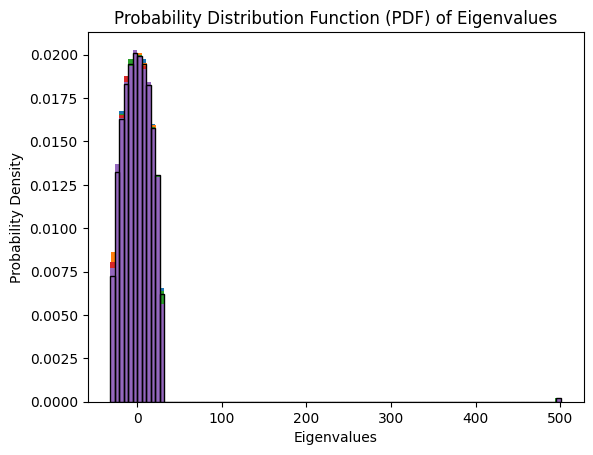

In [3]:
for spectrum in ER_spectra_nested_list[-1]:
    eigenvalues = spectrum[0]
    plt.hist(eigenvalues, bins=100, density=True)

concatenated = np.concatenate([i[0] for i in ER_spectra_nested_list[-1]])
plt.hist(concatenated, bins=100, density=True,  fill=False)



plt.title('Probability Distribution Function (PDF) of Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Probability Density')
plt.show()

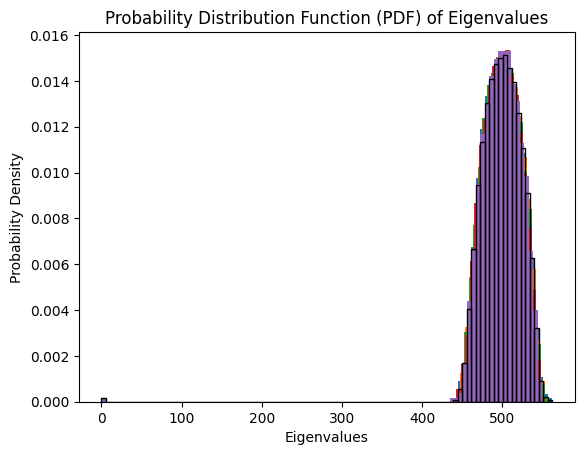

In [25]:
for spectrum in ER_spectra_nested_list[-1]:
    eigenvalues = spectrum[1]
    plt.hist(eigenvalues, bins=100, density=True)

concatenated = np.concatenate([i[1] for i in ER_spectra_nested_list[-1]])
plt.hist(concatenated, bins=100, density=True,  fill=False)



plt.title('Probability Distribution Function (PDF) of Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Probability Density')
plt.show()

# SBM

In [8]:
def stochastic_block_model(num_blocks, block_sizes, p_within_block, q_between_blocks):
    '''
    Generates a stochastic block model (SBM) graph.

    Parameters:
    -----------
    num_blocks : int
        The number of blocks (or communities) in the graph.

    block_sizes : int or list of int
        If an integer is provided, it indicates that each block should have the same size.
        If a list is provided, it must have a length equal to num_blocks, where each element represents 
        the size of the corresponding block. 

    p_within_block : float
        The probability of edges within the same block.

    q_between_blocks : float
        The probability of edges between different blocks.

    Returns:
    --------
    graph : networkx.Graph
        A graph object representing the stochastic block model.
    
    Raises:
    -------
    ValueError:
        If block_sizes is not a list of length equal to num_blocks and is not an integer.
    '''

    # Check if block_sizes is an integer or a list
    if isinstance(block_sizes, int):
        # Create a list with equal block sizes
        block_sizes = [block_sizes] * num_blocks
    elif isinstance(block_sizes, list):
        # Check if the length of block_sizes matches num_blocks
        if len(block_sizes) != num_blocks:
            raise ValueError("The length of block_sizes must be equal to num_blocks.")
    else:
        # Raise an error if block_sizes is neither an int nor a list
        raise ValueError("block_sizes must be either an integer or a list of length equal to num_blocks.")

    # Generate block probabilities matrix
    prob_matrix = [[p_within_block if i == j else q_between_blocks for j in range(num_blocks)] for i in range(num_blocks)]

    # Generate stochastic block model graph
    graph = nx.stochastic_block_model(block_sizes, prob_matrix)

    return graph

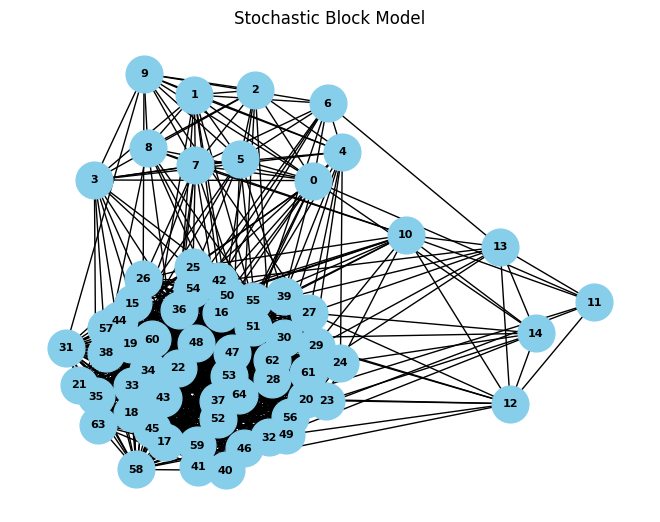

In [12]:
# Example usage
num_blocks = 3
block_size = [10, 5, 50]
p_within_block = 0.8
q_between_blocks = 0.1

sbm_graph = stochastic_block_model(num_blocks, block_size, p_within_block, q_between_blocks)

# Plot the graph using NetworkX
pos = nx.spring_layout(sbm_graph)
nx.draw(sbm_graph, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=700, font_size=8)
plt.title("Stochastic Block Model")
plt.show()


In [7]:
G = nx.to_numpy_array(sbm_graph)
laplacian = np.diag(np.asarray(G.sum(1)).squeeze()) - G
eigs = np.linalg.eigvalsh(laplacian) # this is for numpy arrays and it returns all the eigenvalues
print(eigs)
eigs = np.where(eigs > 0, eigs, 1)
print(eigs)

[-5.20127173e-15  1.64989269e+00  2.35272947e+00  4.22619547e+00
  5.91401446e+00  6.02819144e+00  6.60967437e+00  6.94359028e+00
  7.00027010e+00  7.65648494e+00  7.78597127e+00  8.55410909e+00
  8.59034326e+00  8.72807874e+00  9.08739956e+00  9.42714880e+00
  9.66297726e+00  9.95052785e+00  1.00721147e+01  1.03379825e+01
  1.04919214e+01  1.06858797e+01  1.11679215e+01  1.16971879e+01
  1.17782758e+01  1.24007610e+01  1.27998831e+01  1.30009880e+01
  1.37605810e+01  1.56389043e+01]
[ 1.          1.64989269  2.35272947  4.22619547  5.91401446  6.02819144
  6.60967437  6.94359028  7.0002701   7.65648494  7.78597127  8.55410909
  8.59034326  8.72807874  9.08739956  9.4271488   9.66297726  9.95052785
 10.07211471 10.33798247 10.49192145 10.68587967 11.16792153 11.69718788
 11.7782758  12.40076101 12.79988314 13.00098798 13.76058099 15.6389043 ]


In [13]:
# Set the number of samples
n_samples = 5  # Adjust as needed

# Define parameter ranges
num_blocks_range = range(2, 7)
block_size_range = range(4, 20, 5)
p_within_block_range = np.linspace(0.1, 0.9, 5)
q_between_blocks_range = np.linspace(0.01, 0.1, 5)

# Initialize nested lists to store adjacency matrices
laplacians_nested_list = []
spectra_nested_list = []
# Generate graphs for different parameter combinations
for num_blocks in num_blocks_range:
    block_size_list = []
    spectra_block_size_list = []
    for block_size in block_size_range:
        p_within_block_list = []
        spectra_p_within_block_list = []
        for p_within_block in p_within_block_range:
            q_between_blocks_list = []
            spectra_q_between_blocks_list = []
            for q_between_blocks in q_between_blocks_range:
                matrices_samples = []
                spectra = np.empty([n_samples, 3], dtype='object')
                for i in range(n_samples):
                    sbm_graph = stochastic_block_model(num_blocks, block_size, p_within_block, q_between_blocks)
                    adjacency_matrix = nx.to_numpy_array(sbm_graph, dtype=int)
                    laplacian = np.diag(np.asarray(adjacency_matrix.sum(1)).squeeze()) - adjacency_matrix
                    exponential = scipy.linalg.expm(-laplacian)
                    matrices = [adjacency_matrix, laplacian, exponential]
                    matrices_samples.append(matrices)
                    for j, m in enumerate(matrices):
                        eigs = np.linalg.eigvalsh(m) # this is for numpy arrays and it returns all the eigenvalues
                        eigs = np.where(eigs > 0, eigs, 1)
                        sorted_eigs = np.sort(eigs)
                        spectra[i, j]= sorted_eigs
                q_between_blocks_list.append(matrices_samples)
                spectra_q_between_blocks_list.append(spectra.reshape(spectra.shape[0], spectra.shape[1], 1))
            p_within_block_list.append(q_between_blocks_list)
            spectra_p_within_block_list.append(spectra_q_between_blocks_list)
        block_size_list.append(p_within_block_list)
        spectra_block_size_list.append(spectra_p_within_block_list)
    laplacians_nested_list.append(block_size_list)
    spectra_nested_list.append(spectra_block_size_list)

# Now adjacency_matrices_nested_list is a fully nested list


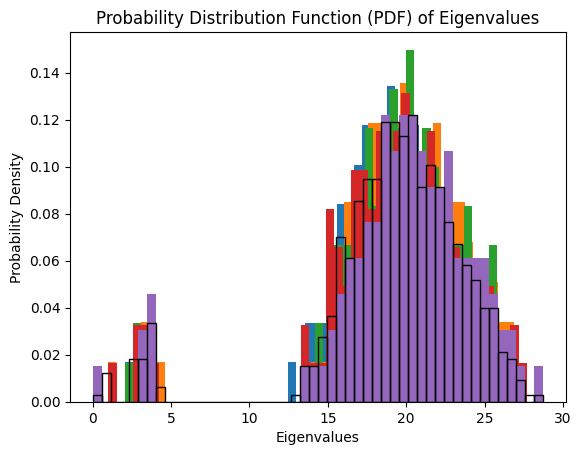

In [14]:
for spectrum in spectra_nested_list[4][3][4][1]:
    eigenvalues = spectrum[1,0]
    hist, bins = np.histogram(eigenvalues, bins=50, density=True)

    # Calculate the probability distribution function (PDF)
    pdf = hist / np.sum(hist) / np.diff(bins)

    # Plot the PDF
    plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')

concatenated = np.concatenate([i[1,0] for i in spectra_nested_list[4][3][4][1]])
hist, bins = np.histogram(concatenated, bins=50, density=True)

# Calculate the probability distribution function (PDF)
pdf = hist / np.sum(hist) / np.diff(bins)

# Plot the PDF
plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge', fill=False)

plt.title('Probability Distribution Function (PDF) of Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Probability Density')
plt.show()

In [15]:
matrix_spectra = np.array([num_blocks_range[1], block_size_range[7]])
matrix_spectra

IndexError: range object index out of range

In [16]:
for spectrum in spectra_nested_list[1][7][4][2]:
    # Calculate the empirical distribution function (EDF)
    eigenvalues = spectrum[1]
    edf = np.arange(1, len(eigenvalues) + 1) / len(eigenvalues)
    # Plot the EDF
    plt.step(eigenvalues, edf, where='post')

plt.title('Empirical Distribution Function (EDF) of Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Cumulative Probability')
plt.show()

IndexError: list index out of range

In [ ]:
# eigs = np.linalg.eigvalsh(rho) # this is for numpy arrays and it returns all the eigenvalues
# eigs = np.where(eigs > 0, eigs, 1)
# self.spectral_vNS[lamda] = [- 1/np.log(self.num_nodes) * np.sum(eigs*np.log(eigs))]

In [ ]:
eigs = np.linalg.eigvalsh(rho) # this is for numpy arrays and it returns all the eigenvalues
eigs = np.where(eigs > 0, eigs, 1)
self.spectral_vNS[lamda] = [- 1/np.log(self.num_nodes) * np.sum(eigs*np.log(eigs))]

In [ ]:
concatenated.shape

# Simple Case

In [17]:
# Set the number of samples
n_samples = 5  # Adjust as needed

# Define parameter ranges
num_blocks_range = 2
block_size_range = range(900, 1001, 50)
p_within_block_range = 0.5
q_between_blocks_range = 0.01

# Initialize nested lists to store adjacency matrices
laplacians_nested_list = []
spectra_nested_list = []
# Generate graphs for different parameter combinations

for block_size in block_size_range:
    matrices_samples = []
    spectra = np.empty([n_samples, 3], dtype='object')
    for i in range(n_samples):
        sbm_graph = stochastic_block_model(num_blocks_range, block_size, p_within_block_range, q_between_blocks_range)
        adjacency_matrix = nx.to_numpy_array(sbm_graph, dtype=int)
        laplacian = np.diag(np.asarray(adjacency_matrix.sum(1)).squeeze()) - adjacency_matrix
        exponential = scipy.linalg.expm(-laplacian)
        matrices = [adjacency_matrix, laplacian, exponential]
        matrices_samples.append(matrices)
        for j, m in enumerate(matrices):
            if j!= 2:
                eigs = np.linalg.eigvalsh(m) # this is for numpy arrays and it returns all the eigenvalues
            if j == 1:
                eigs = np.where(eigs > 0, eigs, 1)
            else:
                if j == 2:
                    #eigs = np.where(eigs > 0, eigs, 1)
                    eigs = np.exp(-1* spectra[i, j-1])
            sorted_eigs = np.sort(eigs)
            spectra[i, j]= sorted_eigs
        print(i)
    laplacians_nested_list.append(matrices_samples)
    spectra_nested_list.append(spectra)

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


In [18]:
(np.diag(np.asarray(adjacency_matrix.sum(1)).squeeze()) - adjacency_matrix).shape

(2000, 2000)

In [19]:
np.mean(np.diag(np.asarray(adjacency_matrix.sum(1)).squeeze() - adjacency_matrix))

510.084

In [20]:
np.var(np.diag(np.asarray(adjacency_matrix.sum(1)).squeeze() - adjacency_matrix))

266.09294399999993

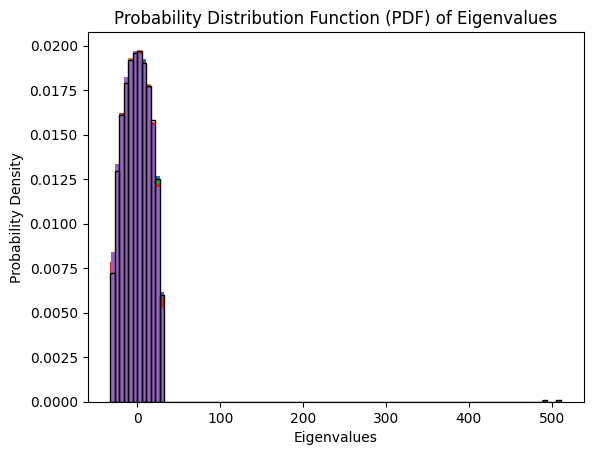

In [21]:
for spectrum in spectra_nested_list[-1]:
    eigenvalues = spectrum[0]
    plt.hist(eigenvalues, bins=100, density=True)

concatenated = np.concatenate([i[0] for i in spectra_nested_list[-1]])
plt.hist(concatenated, bins=100, density=True,  fill=False)



plt.title('Probability Distribution Function (PDF) of Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Probability Density')
plt.show()

# Simple case: Different sizes

In [22]:
# Set the number of samples
n_samples = 5  # Adjust as needed

# Define parameter ranges
num_blocks_range = 2
block_size_range = range(2)
p_within_block_range = 0.5
q_between_blocks_range = 0.01

# Initialize nested lists to store adjacency matrices
laplacians_nested_list = []
spectra_nested_list = []
# Generate graphs for different parameter combinations

for bs in block_size_range:
    block_sizes = [[500, 100], [2000, 1000]]
    matrices_samples = []
    spectra = np.empty([n_samples, 3], dtype='object')
    for i in range(n_samples):
        sbm_graph = stochastic_block_model(num_blocks_range, block_sizes[bs], p_within_block_range, q_between_blocks_range)
        adjacency_matrix = nx.to_numpy_array(sbm_graph, dtype=int)
        laplacian = np.diag(np.asarray(adjacency_matrix.sum(1)).squeeze()) - adjacency_matrix
        exponential = scipy.linalg.expm(-laplacian)
        matrices = [adjacency_matrix, laplacian, exponential]
        matrices_samples.append(matrices)
        for j, m in enumerate(matrices):
            if j!= 2:
                eigs = np.linalg.eigvalsh(m) # this is for numpy arrays and it returns all the eigenvalues
            if j == 1:
                eigs = np.where(eigs > 0, eigs, 1)
            else:
                if j == 2:
                    #eigs = np.where(eigs > 0, eigs, 1)
                    eigs = np.exp(-1* spectra[i, j-1])
            sorted_eigs = np.sort(eigs)
            spectra[i, j]= sorted_eigs
        print(i)
    laplacians_nested_list.append(matrices_samples)
    spectra_nested_list.append(spectra)

0
1
2
3
4
0
1
2
3
4


In [23]:
(np.diag(np.asarray(adjacency_matrix.sum(1)).squeeze()) - adjacency_matrix).shape

(3000, 3000)

In [24]:
np.mean(np.diag(np.asarray(adjacency_matrix.sum(1)).squeeze() - adjacency_matrix))

846.0046666666667

In [25]:
np.var(np.diag(np.asarray(adjacency_matrix.sum(1)).squeeze() - adjacency_matrix))

53847.55997822222

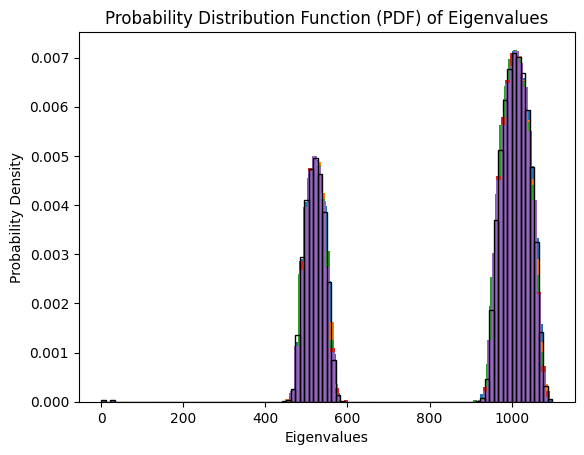

In [26]:
for spectrum in spectra_nested_list[-1]:
    eigenvalues = spectrum[1]
    plt.hist(eigenvalues, bins=100, density=True)

concatenated = np.concatenate([i[1] for i in spectra_nested_list[-1]])
plt.hist(concatenated, bins=100, density=True,  fill=False)



plt.title('Probability Distribution Function (PDF) of Eigenvalues')
plt.xlabel('Eigenvalues')
plt.ylabel('Probability Density')
plt.show()